<center><h2> CPE 4040 Spring 2024: Homework 5</h2></center>

1. Write your answer in the cell provided under each question.
2. __You must write comments to explain your thoughts and earn full credit__.
3. __Show your execution result__.
4. Do your own work. __Do not copy-and-paste other people's (or Generative AI's) codes.__
5. <font color=blue> You can find Matplotlib code snippets in the accompanying Jupyter Notebook file to help you make time-domain and frequency-domain plots.  

### Submission:
 * __Submit this notebook file and the pdf version__ - remember to add your name in the filename.
 * Deadline: 11:59 pm, 3/22 (Friday)

In [296]:
import pandas as pd
import numpy as np

from numpy.fft import fft, ifft

In [297]:
import matplotlib.pyplot as plt

## Q1: Signal Processing: Square Wave and Random Noise (60 Points)

__A communication system is commonly modelled by the transmitted signal, the channel, and the receiver.__ 

__Let's consider a simple system where the signal is a `square wave` and the the channel adds `white Gaussian noise` to the signal. Therefore, the received signal is represented by__

__$$r(t) = s(t) + n(t)$$ where $s(t)$ = square wave, $n(t)$ = Gaussian noise.__

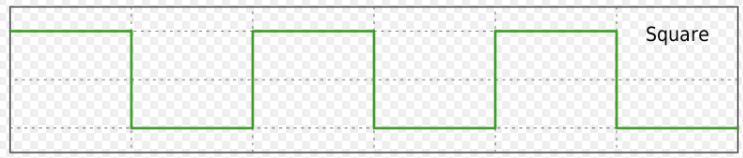

### 1. (8 Points) Generate a periodic square wave by taking a `sign function` on the sine wave, that is,

$$
s(t) = 
\begin{cases} 
1 & \text{if } \sin(2\pi ft) \ge 0 \\
-1 & \text{if } \sin(2\pi ft) < 0
\end{cases}
$$

* Plot a 10-second __square wave__ with amplitude 1, $f$ = 4Hz and sampling rate $f_s$ = 100Hz. Use Matplotlib to plot the signal. You should have a total of 1000 samples. 

* Properly label the x-axis ("Time"), and y-axis ("Amplitude").


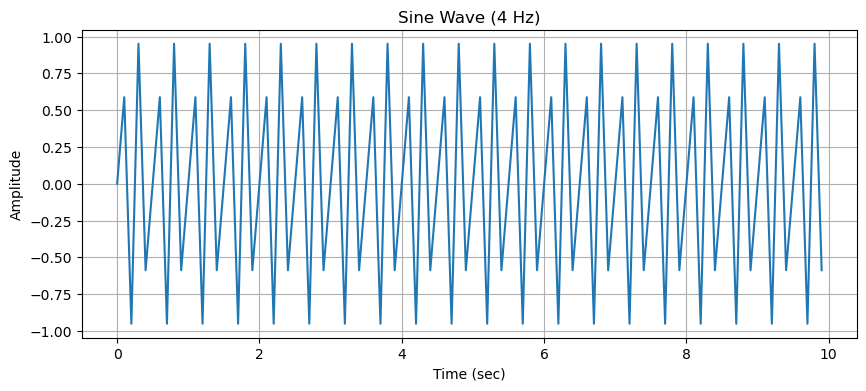

In [298]:
def generate_sine_wave(freq, sample_rate, duration):

    t = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    y = np.sin((2 * np.pi) * freq * t)
    
    return t, y

# Define the parameters
freq = 4           # Frequency in Hz
sample_rate = 100  # Sampling rate in Hz
duration = 10      # Duration in seconds

# Generate the sine wave
t, y = generate_sine_wave(f, fs, duration)

# Plot the sine wave
plt.figure(figsize=(10, 4))
plt.plot(t, y)
plt.title("Sine Wave (4 Hz)")
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

### <font color= green> Generate the square wave

In [299]:
def generate_square_wave(freq, sample_rate, duration):
    t, sine_wave = generate_sine_wave(freq, sample_rate, duration)
    square_wave = np.sign(sine_wave)
    return t, square_wave

# Defined the parameters
freq = 4           # Frequency in Hz
sample_rate = 100  # Sampling rate in Hz
duration = 10      # Duration in seconds

# Generating the square wave
t, square_wave = generate_square_wave(freq, sample_rate, duration)


### <font color= green> Plot the square wave

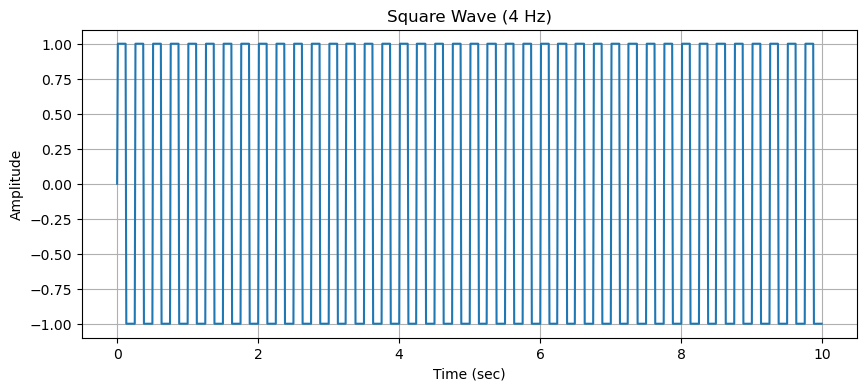

In [300]:
# Plot the square wave
plt.figure(figsize=(10, 4))
plt.plot(t, square_wave)
plt.title("Square Wave (4 Hz)")
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

### 2. (6 Points) Frequency domain representation of the square wave. 

Apply the `calculate_fft( )` function below and use Matplotlib to plot the Fourier Transform result for `frequency range from 0 to 50 Hz`.

In [301]:
from numpy.fft import fft, ifft

def calculate_fft(signal,fs):
    N = len(signal)
    n = np.arange(N)
    freqs = n*fs/N                 # the frequency bins
    mag_fft = abs(fft(signal)/N)   # calculate the magnitude of fft
    return freqs, mag_fft

### <font color= green> Calculate the FFT

In [302]:
fs = 100
duration = 10     # 10 seconds 
f = 4             # the center frequency
time, x = generate_square_wave(f, fs, duration) #this is the squarewave

freq, mag = calculate_fft(x, fs)

### <font color= green> Plot FFT of the square wave for frequency range 0 to 50Hz

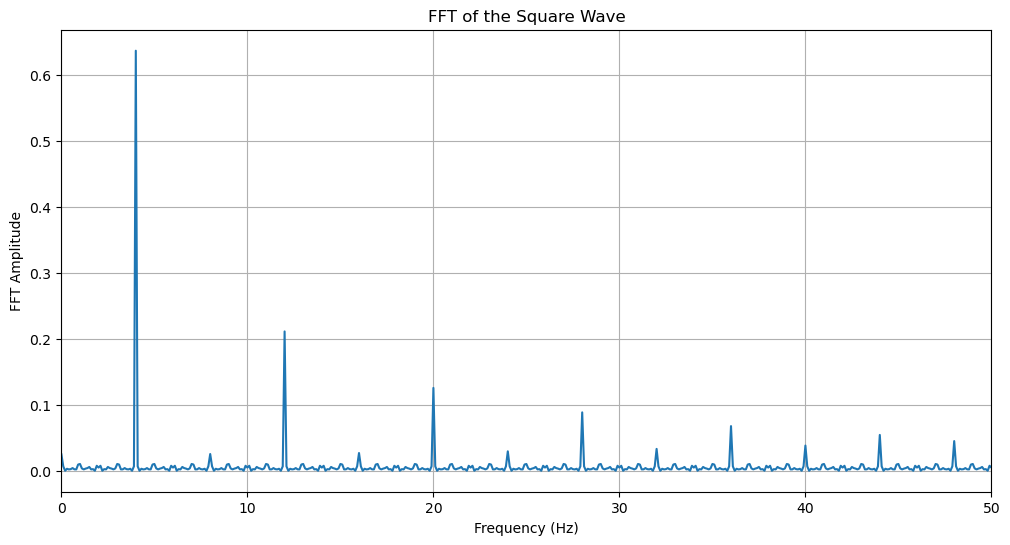

In [303]:
plt.figure(figsize=(12,6))
plt.plot(freq, mag)
plt.xlim(0, fs/2)  #there's several peaks


plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.title('FFT of the Square Wave')
plt.grid()

plt.show()

### 3. (10 Points) Find Peak Frequency Components 

You can see a few distinct peaks in the FFT from Step 2. Write a code to identify the frequencies of the top five peaks in the FFT plot, `for frequency range from 0 to 50 Hz`.

Please list the frequencies and their corresponding magnitudes.

In [304]:
df = pd.DataFrame({'Frequency': freq, 'Magnitude': mag})

df_filtered = df[(df['Frequency'] >= 0) & (df['Frequency'] <= 50)]

df_sorted = df_filtered.sort_values(by='Magnitude', ascending=False)

top_peaks = df_sorted.head(5)

print(top_peaks)

     Frequency  Magnitude
40         4.0   0.636273
120       12.0   0.211172
200       20.0   0.125620
280       28.0   0.088604
360       36.0   0.067807


### 4. (5 Points) Generate an array of Gausian noise with mean = 0 and standard deviation = 0.5

Use `np.random.normal` to generate the noise array. The size of the noise array should also be 1000.

Add the square wave array from 1 and the noise array together. Plot the resulting array.

### <font color= green> Generate the Gaussian noise and the noisy signal

In [305]:
## Adding Gaussian noise (mu=0, std=1) to each sample in x
noise = 0.5*np.random.normal(0, 1, size=square_wave.size)

# Defined the parameters from question 1
freq = 4           # Frequency in Hz
sample_rate = 100  # Sampling rate in Hz
duration = 10      # Duration in seconds

# Generating the square wave from question 1
t, square_wave = generate_square_wave(freq, sample_rate, duration)

signal = square_wave + noise #noise + square-wave

### <font color= green> Plot the noisy signal

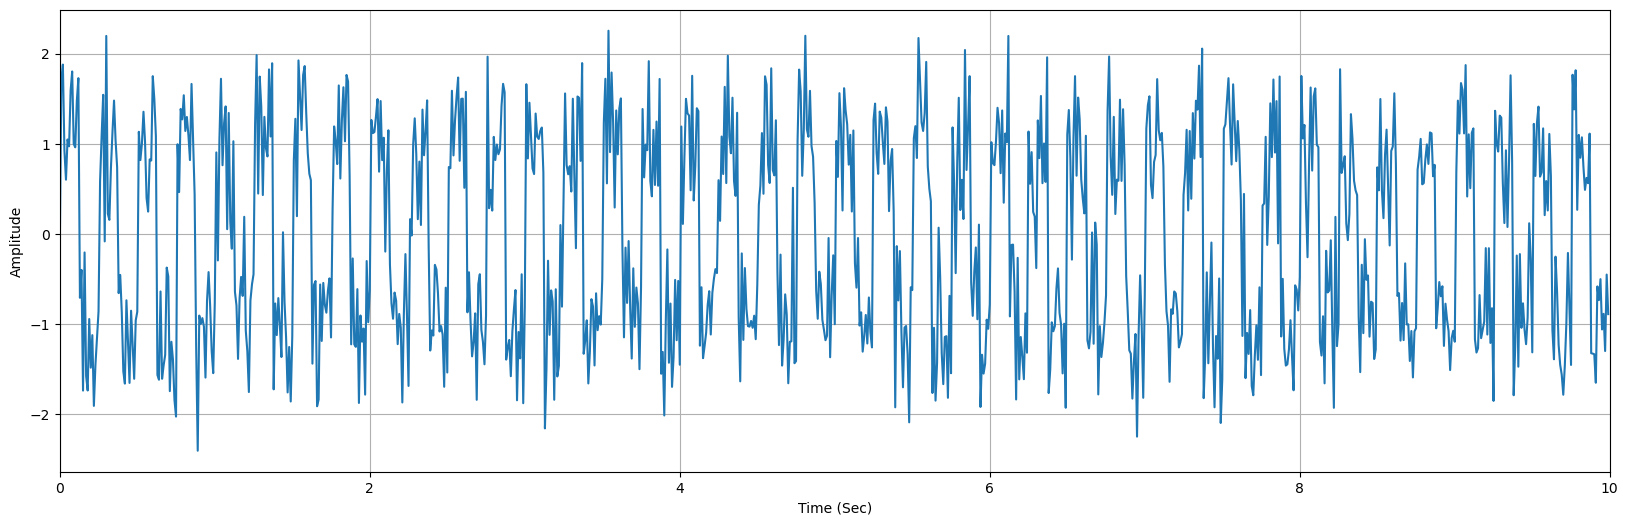

In [306]:
plt.figure(figsize=(20,6))
plt.plot(time, signal)
plt.xlim(0, 10)

plt.xlabel('Time (Sec)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

### 5. (6 Points) Signal-to-noise ratio (SNR) is an important quality indicator of the communication channel.

     SNR(dB) = 10log10(P_s/P_n), where P_s is the average signal power and P_n is the average noise power.

Please calculate the SNR(dB) of this case. The average power of a sequence of signals = $\sum_{i=1}^N s^2/N$, where $N$ is the number of samples.

In [307]:
def calculate_snr(signal, noise):
    return 10 * np.log10(np.sum(signal ** 2) / np.sum(noise ** 2))

print('SNR = ', calculate_snr(square_wave,noise))

SNR =  5.965693696421591


### 6. (10 Points) Implement a moving-average low-pass filter. 

A moving-average filter is a simple yet effective digital low-pass filter that reduces random noises in the signal. It is characterized by its filter length $L$, specifying how many of the last points of the signal will be averaged to produce the next point in the output.

$$y[n] = \frac{1}{L}\sum_{i=0}^{L-1}x[n-i] $$
where $x[n]$ is the noisy signal, $L$ is the length of the filter, and $y[n]$ is the filtered signal.

* Write a Python function `moving_average_filter` that implements this low-pass filter. The function should accept two parameters: `noisy_signal` and `L`. It should return the filtered signal array. For this exercise, set $L=7$ for the length of the filter.

* Visualization: Plot the noisy signal and the filtered signal in the same figure.

* Please make a comment to compare the signals before and after the filtering. 

### <font color= green> Define the function for moving-average filter and calculate the filter output

In [308]:
def moving_average_filter (noisy_signal,L):
    L = 7 # filter size
    
    filter_kernel = np.ones(L) / L
    
    filtered_signal = np.convolve(signal, filter_kernel, mode='same')
    filtered_signal.size

### <font color= green> Plot the noisy signal and the filtered signal

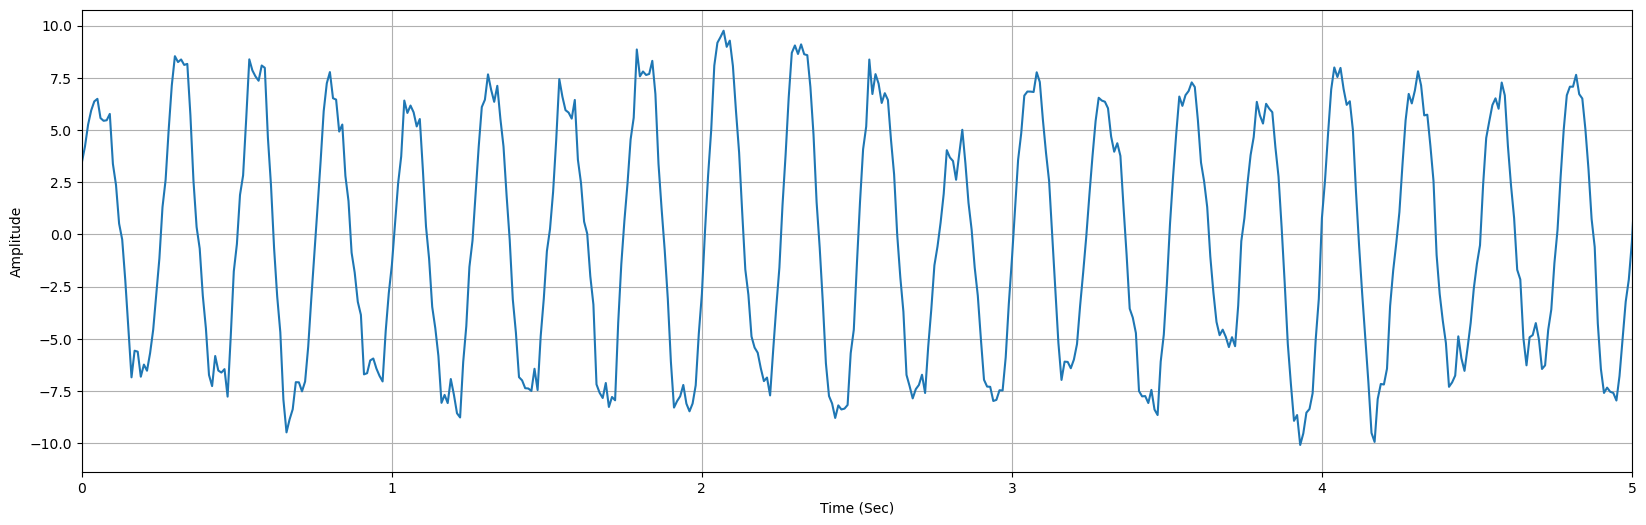

In [309]:
plt.figure(figsize=(20,6))
plt.plot(time, filtered_signal)
plt.xlim(0, 5)

plt.xlabel('Time (Sec)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

### <font color=green> Compare the signals before and after the filtering.

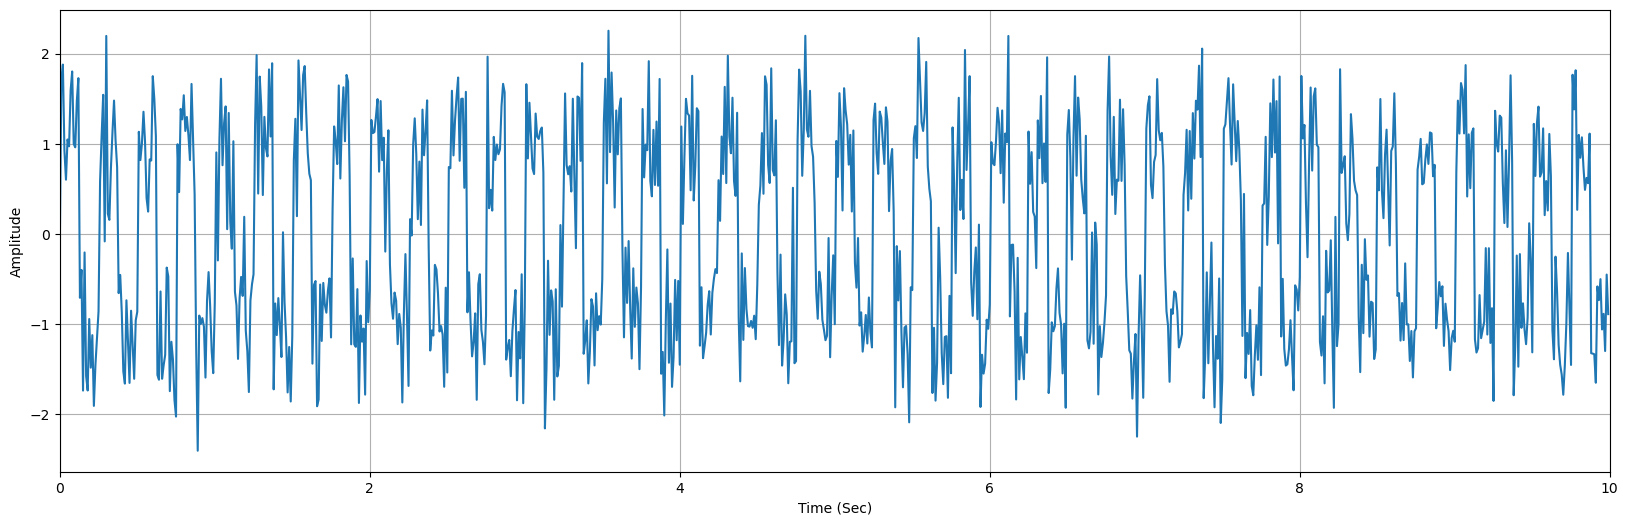

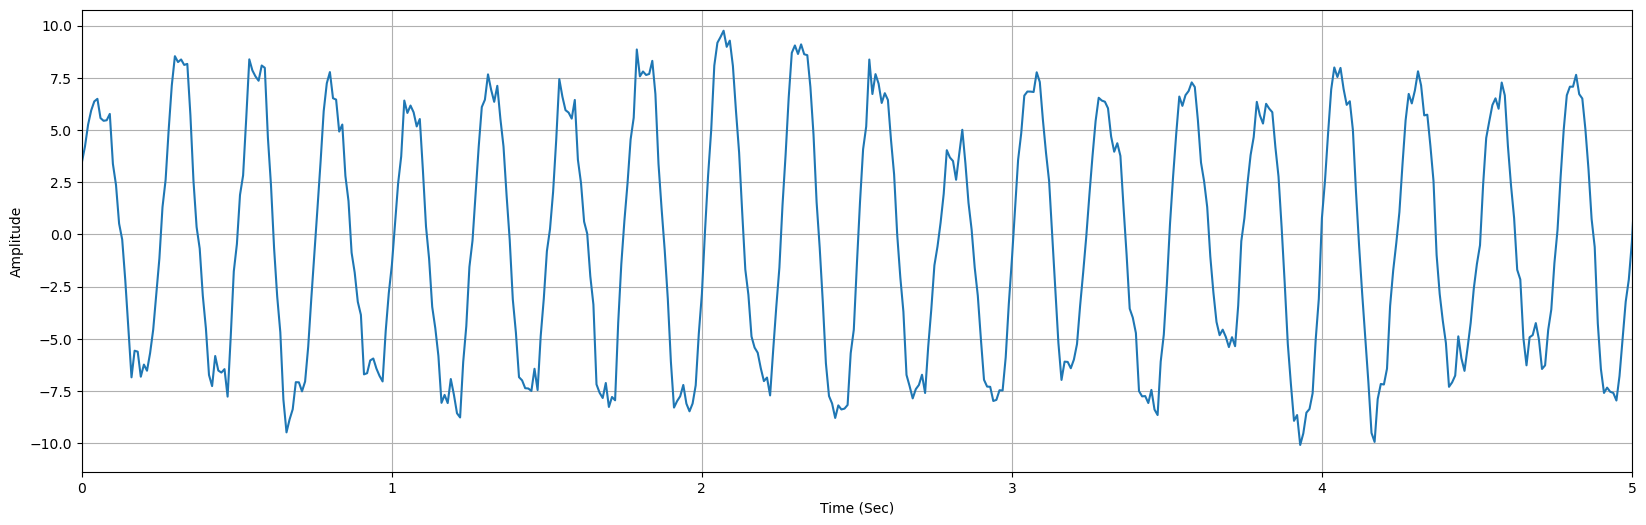

In [310]:
#Before filtering with the noise added to the orignal square-wave we see a
# lot of peaks and interference in the singal
plt.figure(figsize=(20,6))
plt.plot(time, signal)
plt.xlim(0, 10)

plt.xlabel('Time (Sec)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

#After the filtering we get a more solid shape of the line without so many
# random peaks and jarring noise 
plt.figure(figsize=(20,6))
plt.plot(time, filtered_signal)
plt.xlim(0, 5)

plt.xlabel('Time (Sec)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

### 7. (8 Points) Frequency Domain view of the noisy signal and the filtered signal¶

Use FFT to transform both the noisy signal and the filtered signal to the frequency domain.

Visualization: Plot the noisy signal and the filtered signal in the same figure for comparison.You only need to plot in the frequency range between 0 to 5Hz.

Please make an observation on:
* The noise levels before and after moving-average filtering
* The peak frequency components: what happened there?

### <font color=green> Calculate the FFTs

In [311]:
## Noisy signal
fs = 10 #sample rate so that it only plots from 0 to 5Hz
freq, mag = calculate_fft(signal, fs)

freq, mag1 = calculate_fft(filtered_signal, fs)

### <font color= green> Plot FFTs for both the noisy signal and the filtered signal, for frequency range from 0 to 50Hz

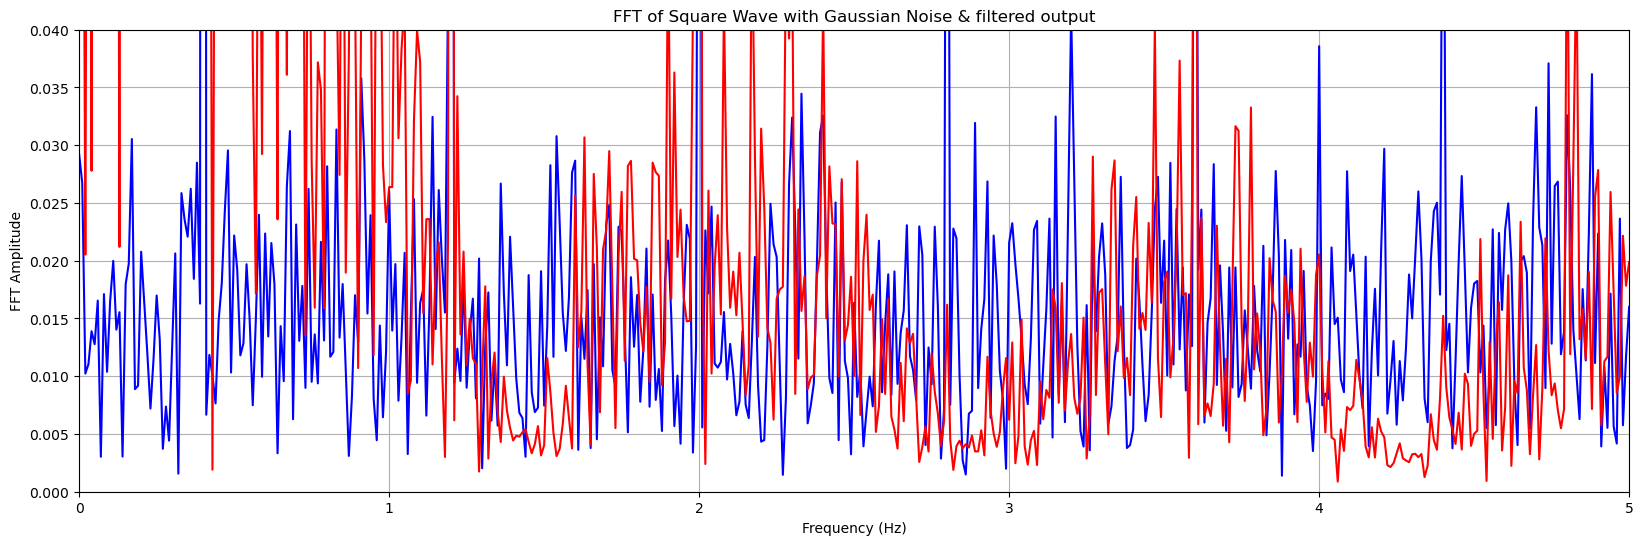

In [312]:
plt.figure(figsize=(20,6))
plt.plot(freq, mag, 'blue')
plt.plot(freq, mag1, 'red')
plt.xlim(0, fs/2) #0 to (10/2) = 0 to 5 Hz plotted
plt.ylim(0, 0.04) #mag.max()

plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.title(f'FFT of Square Wave with Gaussian Noise & filtered output')

plt.grid()
plt.show()

### <font color=green> Your observations

In [313]:
#the noisy signal is in blue and the filtered signal is in red
#we can see that between the two, at first both are terribly noisy 
#however over time the red (filtered signal) becomes more tame and easy to see 

### 8. (7 Points) Frequency domain representation of the moving-average filter¶

To gain an insight on how the signal and the noise are shaped by the moving-average filter in the frequency domain, you will calculate the FFT of the filter (we call it the `frequency response`).

Recall in Step 6, the $L$-tap moving-average filter is represented by 
$$ h = \big[ \frac{1}{L}, \frac{1}{L}, \frac{1}{L}, \cdots, \frac{1}{L} \big] $$

* Apply FFT on the filter, $h$, and plot the result for frequency range from 0 to 50Hz. Assume $L=7$. 

* Please make a comment on the shape of the frequency response and explain how it affects the noise and signal in Step 7.

### <font color=green> Calculate the FFT of the 7-tap moving-average filter

In [314]:
    L = 7 # filter size
    filter_kernel_1 = (np.ones(L) / L)*7
    filtered_signal = np.convolve(signal, filter_kernel_1, mode='same')
    filtered_signal.size
    

freq, mag1 = calculate_fft(filtered_signal, fs)

### <font color= green> Plot FFT of the 7-tap moving-average filter

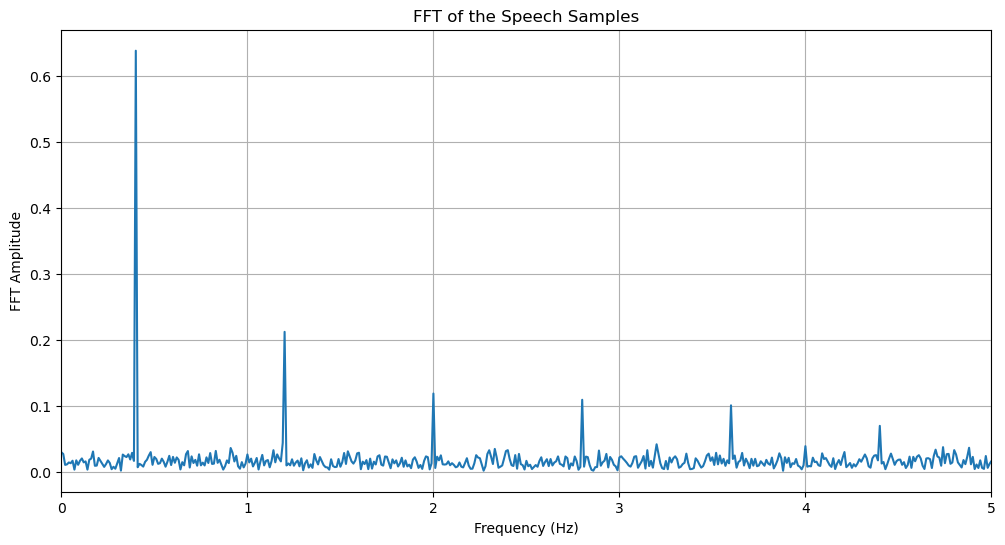

In [315]:
plt.figure(figsize=(12,6))
plt.plot(freq, mag)
plt.xlim(0, fs/2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.title('FFT of the Speech Samples')
plt.grid()

plt.show()

### <font color=green> Make a comment on the shape of the frequency response and explain how it affects the noise and signal in Step 7

In [316]:
#i'm not quite sure i did this quite right

<h2>Q2: DataFrame indexing and slicing (20 Points)</h2>

<h3>1. Create a DataFrame with the same row indices, column labels, and data as the table below.</h3>

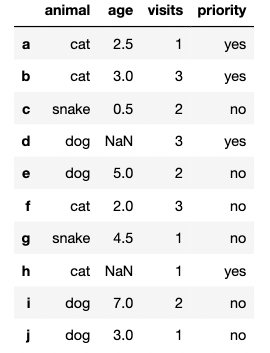

In [317]:
vet_data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'], 
        'age': [2.5, 3, 0.5, None, 5, 2, 4.5, None, 7, 3], 
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1], 
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = list('abcdefghij')

df = pd.DataFrame(vet_data, index=labels)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


<h3>2. Select only the 'animal' and 'visits' columns from the DataFrame and show the result.</h3>

In [318]:
df[['animal','visits']]

,animal,visits
a,cat,1
b,cat,3
c,snake,2
d,dog,3
e,dog,2
f,cat,3
g,snake,1
h,cat,1
i,dog,2
j,dog,1


<h3>3. Select the data in rows 'c', 'f', and 'g' and in columns 'animal' and 'age'. Show the result.</h3>

In [319]:
df.iloc[[2,5,6],[0,1]]

,animal,age
c,snake,0.5
f,cat,2.0
g,snake,4.5


<h3>4. Select the rows where the animal is a dog and the age is less than 5.</h3>

In [320]:
df[(df['animal']=='dog') & (df['age']<5)]

,animal,age,visits,priority
j,dog,3.0,1,no


<h3>5. In the 'animal' column, change the 'snake' entries to 'python'</h3>

In [321]:
df.loc[df['animal']=='snake','animal']='python'

df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,python,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,python,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


<h3>6. Select the rows where the age is missing, i.e. age value is NaN.</h3>

In [322]:
 df[df.isna().age] #all the rows contain an NaN in age

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


<h3>7. We want to clean up the NaN by replacing it with the average age of the dogs (or cats).</h3>
<h3>First, please find out the average age of the dogs and the average age of the cats.</h3>

In [323]:
age ={}

for a in ('dog','cat'):
    m = df[df.animal == a].age.mean(0)
    age[a] = m

age_df = pd.Series(age)
age_df

dog    5.0
cat    2.5
dtype: float64

<h3>8. Replace the NaNs with the average ages and show the resulting DataFrame</h3>

In [324]:
df.fillna(m) #m is the mean age I found for both dog and cat in 7

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,python,0.5,2,no
d,dog,2.5,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,python,4.5,1,no
h,cat,2.5,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


<h2>Q3: DataFrame Arithmetics (20 Points)</h2>
    
<h3> 1. Generate a DataFrame that has 10 rows and 8 columns of random numbers (use np.random.rand). </h3>
<h3>Label the columns A, B, C, D, E, F, G and H.</h3>

In [325]:
df = pd.DataFrame(np.random.randint(0,100,size=(10, 8)),columns=list('ABCDEFGH'))
df

,A,B,C,D,E,F,G,H
0,96,97,15,18,45,52,16,76
1,32,78,90,44,38,44,75,12
2,50,21,87,52,20,79,7,27
3,63,49,39,74,39,46,58,90
4,8,39,13,59,37,30,43,41
5,31,59,26,75,60,38,1,81
6,20,45,97,65,27,75,11,64
7,77,84,94,18,56,11,1,0
8,73,12,67,59,92,54,77,64
9,90,27,20,72,67,82,25,23


<h3>2. Calculate the sum of numbers for each column. Display the result.</h3>

In [326]:
df2 = df.sum(axis=0)
df2

A    540
B    511
C    548
D    536
E    481
F    511
G    314
H    478
dtype: int64

<h3>3. Which column has the smallest sum? Please answer with the column label.</h3>

In [327]:
colName =df2.idxmin()

print(colName)

G


<h3>4. Calculate the mean value for each row, then subtract the mean from each element in the row.</h3>

In [328]:
#find the mean value from each row
print(df.mean(axis=1))

print() #making some space so see the two sections better
#subtract the mean value from element from each row
print("After subtraction Data Frame is:")
print(df.sub(df.mean(axis=1), axis=0))

0    51.875
1    51.625
2    42.875
3    57.250
4    33.750
5    46.375
6    50.500
7    42.625
8    62.250
9    50.750
dtype: float64

After subtraction Data Frame is:
        A       B       C       D       E       F       G       H
0  44.125  45.125 -36.875 -33.875  -6.875   0.125 -35.875  24.125
1 -19.625  26.375  38.375  -7.625 -13.625  -7.625  23.375 -39.625
2   7.125 -21.875  44.125   9.125 -22.875  36.125 -35.875 -15.875
3   5.750  -8.250 -18.250  16.750 -18.250 -11.250   0.750  32.750
4 -25.750   5.250 -20.750  25.250   3.250  -3.750   9.250   7.250
5 -15.375  12.625 -20.375  28.625  13.625  -8.375 -45.375  34.625
6 -30.500  -5.500  46.500  14.500 -23.500  24.500 -39.500  13.500
7  34.375  41.375  51.375 -24.625  13.375 -31.625 -41.625 -42.625
8  10.750 -50.250   4.750  -3.250  29.750  -8.250  14.750   1.750
9  39.250 -23.750 -30.750  21.250  16.250  31.250 -25.750 -27.750


<h3>5. Add an additional row with the mean value of each column. Label this new row "Average".</h3>

In [329]:
df = pd.concat([df, df.mean().to_frame('Average').T])

df

,A,B,C,D,E,F,G,H
0,96.0,97.0,15.0,18.0,45.0,52.0,16.0,76.0
1,32.0,78.0,90.0,44.0,38.0,44.0,75.0,12.0
2,50.0,21.0,87.0,52.0,20.0,79.0,7.0,27.0
3,63.0,49.0,39.0,74.0,39.0,46.0,58.0,90.0
4,8.0,39.0,13.0,59.0,37.0,30.0,43.0,41.0
5,31.0,59.0,26.0,75.0,60.0,38.0,1.0,81.0
6,20.0,45.0,97.0,65.0,27.0,75.0,11.0,64.0
7,77.0,84.0,94.0,18.0,56.0,11.0,1.0,0.0
8,73.0,12.0,67.0,59.0,92.0,54.0,77.0,64.0
9,90.0,27.0,20.0,72.0,67.0,82.0,25.0,23.0
